# Project Title : Titanic

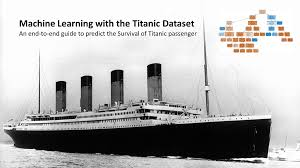

In [1]:
from IPython.display import Image
Image(filename='img.jpeg')

## Project Overview :

## The Titanic dataset is a well-known dataset in the field of data science. It contains information about the passengers who were on board the Titanic when it sank on its maiden voyage in 1912.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [7]:
train = pd.read_csv("/kaggle/input/titanic-classification/train_titanic.csv")
test = pd.read_csv("/kaggle/input/titanic-classification/test_titanic.csv")

## Explore Data

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
161,162,1,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.75,NaN,S


In [10]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
train.shape

(891, 12)

In [13]:
test.shape

(418, 11)

In [14]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
null=train.isnull().sum()
null[null>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

<Axes: >

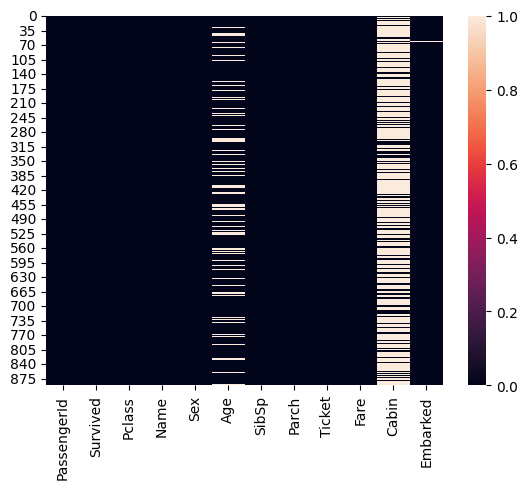

In [19]:
sns.heatmap(train.isnull())

## Data Cleaning

In [20]:
train.drop(columns=['Cabin','Name','Ticket','Embarked','Fare'],axis=1,inplace=True)
test.drop(columns=['Cabin','Name','Ticket','Embarked','Fare'],axis=1,inplace=True)

In [21]:
m=train['Age'].median()
train['Age'].fillna(m,inplace=True)
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

In [22]:
m=test['Age'].median()
test['Age'].fillna(m,inplace=True)
test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 48.9+ KB


## Data Analysis

<Axes: >

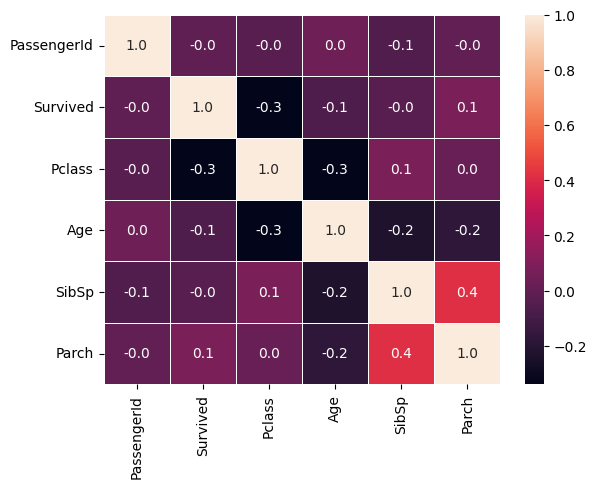

In [24]:
corr=train.drop(columns="Sex",axis=1).corr()
sns.heatmap(corr,annot=True,fmt='.1f',linewidths=0.5)

In [25]:
train.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

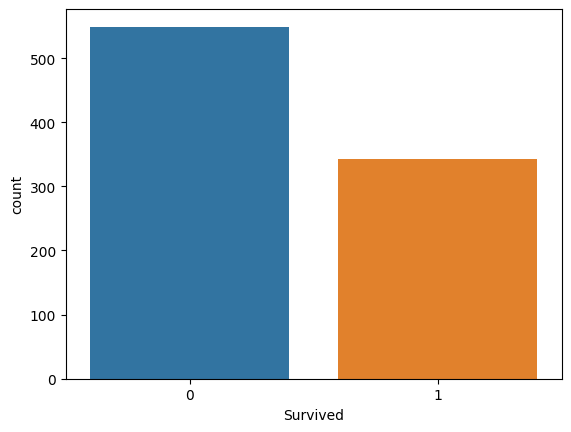

In [26]:
sns.countplot(x='Survived', data=train)
plt.show()

In [29]:
train.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

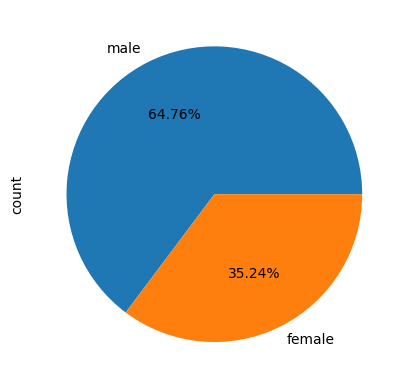

In [30]:
train.Sex.value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

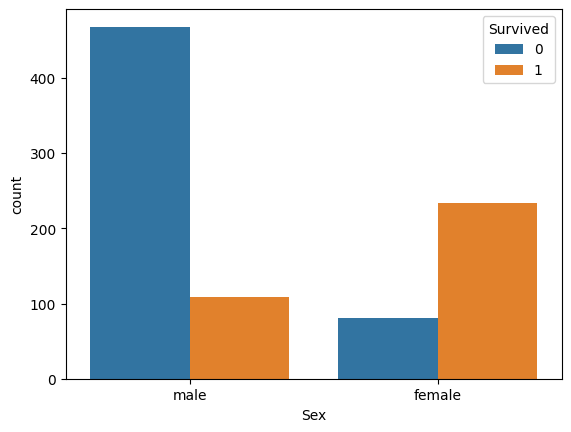

In [31]:
sns.countplot(x='Sex', hue='Survived', data=train)
plt.show()

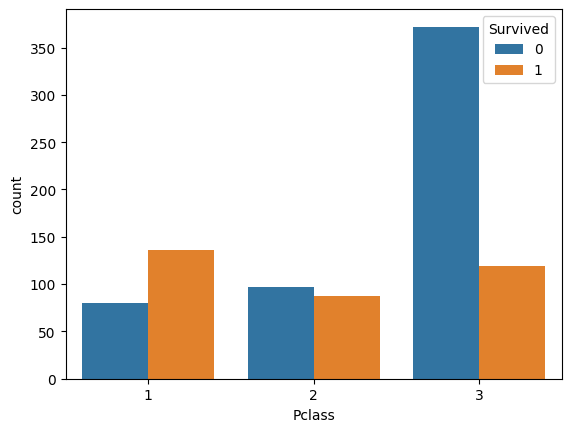

In [32]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.show()

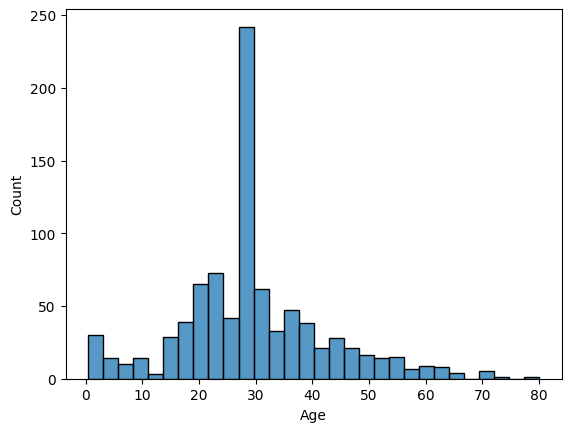

In [33]:
sns.histplot(train.Age)
plt.show()

## Transform data by using Label Encoding 

In [34]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

train['Sex'] = label_encoder.fit_transform(train[['Sex']])
test['Sex'] = label_encoder.fit_transform(test['Sex'])

In [36]:
train['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

## Creating Model

In [38]:
x=train.drop(['Survived'],axis=1)
y=train['Survived']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1234)

In [39]:
Accuracies = []
recalls=[]
f_1=[]

In [40]:
def all(model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(pred,y_test)
    Accuracies.append(accuracy)
    print(f'accuracy of {model} : {accuracy}')
   

In [41]:
m1=LogisticRegression()
m2=SVC()
m3=RandomForestClassifier()
m4=GradientBoostingClassifier(n_estimators=1000)
m5=DecisionTreeClassifier()
m6=KNeighborsClassifier()
m7=GaussianNB()

In [42]:
all(m1)
all(m2)
all(m3)
all(m4)
all(m5)
all(m6)
all(m7)

accuracy of LogisticRegression() : 0.8268156424581006
accuracy of SVC() : 0.6089385474860335
accuracy of RandomForestClassifier() : 0.8100558659217877
accuracy of GradientBoostingClassifier(n_estimators=1000) : 0.7932960893854749
accuracy of DecisionTreeClassifier() : 0.7430167597765364
accuracy of KNeighborsClassifier() : 0.5810055865921788
accuracy of GaussianNB() : 0.8212290502793296


In [43]:
Algorithms=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier',
            'DecisionTreeClassifier','KNeighborsClassifier','GaussianNB']

In [44]:
df = pd.DataFrame({
   'Algorithms' : Algorithms,
   'Accuracies' : Accuracies
})
df

,Algorithms,Accuracies
0,LogisticRegression,0.826816
1,SVC,0.608939
2,RandomForestClassifier,0.810056
3,GradientBoostingClassifier,0.793296
4,DecisionTreeClassifier,0.743017
5,KNeighborsClassifier,0.581006
6,GaussianNB,0.821229


In [45]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [46]:
import joblib

joblib.dump(log_reg, 'log_reg_classifie.pkl')
print("Model saved successfully!")

Model saved successfully!


In [47]:
predd = log_reg.predict(test)

In [48]:
final = test.PassengerId

In [49]:
test_prediction = pd.DataFrame({
    'PassengerId' : final,
    'Survived' : predd 
})

In [50]:
test_prediction.head(15)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
